# Analyzing IMDb Data

EDA project for GA.

Complete a serious of exercises exploring movie rating data from IMDb.

Conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:
- What is the average rating per genre?
- How many different actors are in a movie?

This was a fun exercise as I love movies and really enjoy EDA.

## Basic level

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:

#shortest movie
movies.sort_values(by=['duration']).head(1)

#longest movie
#movies.sort_values(by=['duration']).tail(1)


,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

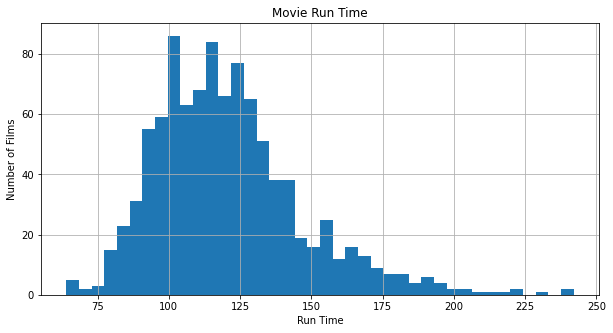

In [8]:
# Answer:

plt.figure(figsize=(10,5))

plt.xlabel('Run Time');
plt.ylabel('Number of Films');
plt.title('Movie Run Time');

#I had tried a lot more bins, but found the benefit quickly drops off.
movies.duration.hist(bins=40);

#### Use a box plot to display that same data.

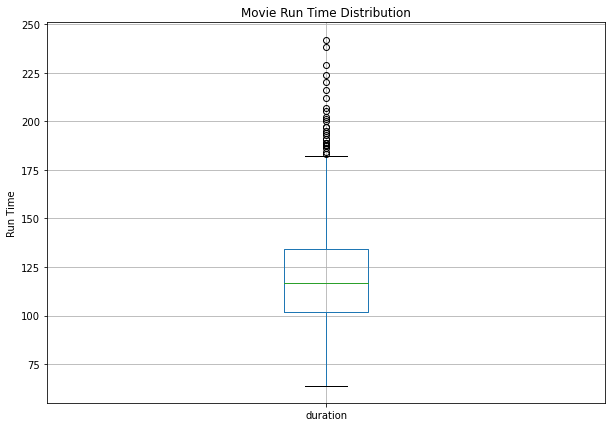

In [9]:
# Answer: using boxplot and Y axis orientation

plt.figure(figsize=(10,7))

plt.ylabel('Run Time');
plt.title('Movie Run Time Distribution');

#I won't lie, this boxplot does not help me interpret the data well and I know what's it's trying to show.
movies.boxplot(column='duration');

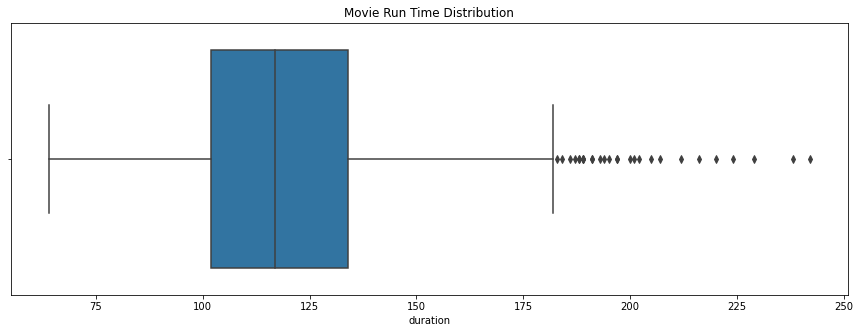

In [7]:
# Answer: using seaborn and X axis orientation

import seaborn as sns

plt.figure(figsize=(15,5))
plt.title('Movie Run Time Distribution');

#this one reads a little better, but still not great to me.
sns.boxplot(data=movies, x = 'duration');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [11]:
# Answer:

movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

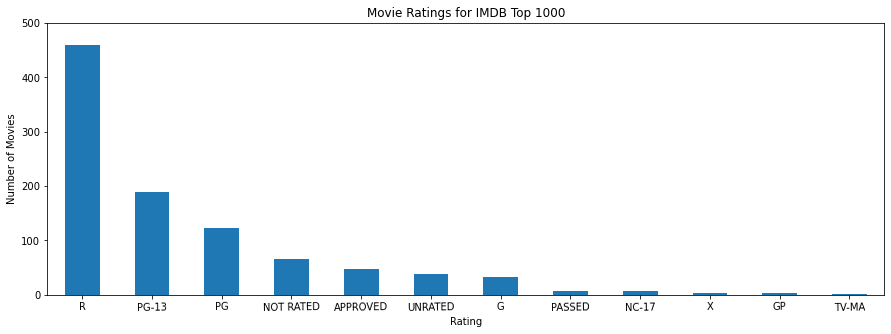

In [12]:
# Answer:

plt.figure(figsize=(15,5))

plt.ylabel('Number of Movies');
plt.xlabel('Rating');
plt.title('Movie Ratings for IMDB Top 1000');

# just a classic bar, but I think it does the job perfectly.
movies.content_rating.value_counts().plot(kind = 'bar', rot=True, ylim=(0,500));

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [13]:
# Answer:  UNRATED": NOT RATED, APPROVED, PASSED, GP.

movies.replace({'NOT RATED':'UNRATED', 'APPROVED':'UNRATED', 'PASSED':'UNRATED', 'GP':'UNRATED'}, inplace=True)

movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [14]:
# Answer: Convert the following content ratings to "NC-17": , TV-MA.

movies.replace({'X':'NC-17', 'TV-MA':'NC-17'}, inplace=True)

movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [15]:
# Answer:

movies.isnull().sum()

#The three moving with a missing value
#movies[movies.content_rating.isnull()]

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [16]:
# Answer: [Movie geek out for a moment].  I didn't need to look these up because I know all three of these movies (I love me
# some movies).  Butch is my favorite of the three, but Eagles and True Grit are also very good.  Anyway, Butch Cassidy, 
# Where Eagles Dare, and True Grit are all PG movies because basically all movies were PG back then.  Today Butch and Eagles 
# could possibly be PG-13, but PG-13 wasn't introduced till 1984.  Interestingly these three movies were all released around 
# the same time (68-69).  John Wayne won an oscar as Rooster Cogburn in True Grit.

movies["content_rating"].fillna("PG", inplace=True)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [19]:
# Answer:

#I first made a column that contained a string idenfying a movie as short (<120 minutes) or long (>120 minutes)
#movies['onetwenty'] = pd.cut(movies.duration, bins=[0,120,250], labels=['short', 'long'])

#Once I had the onetwenty column above I could do a groupby sorting by star_rating
movies.groupby('onetwenty').mean().sort_values('star_rating')['star_rating']

onetwenty
short    7.83849
long     7.95367
Name: star_rating, dtype: float64

#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [8]:
# Answer:  Next three cells using different methods
movies[['duration', 'star_rating']].corr()

# This is not a "visualization" per se, but with so few values being returned I started with this because
# it's pretty easy to see if there is much of a correlation (.227)

,duration,star_rating
duration,1.000000,0.227149
star_rating,0.227149,1.000000


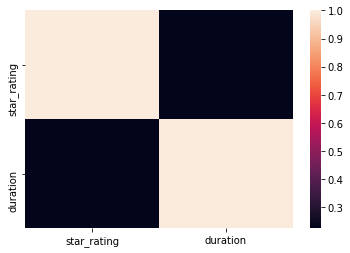

In [21]:
#sns.heatmap(movies[['duration', 'star_rating']].corr());  #helpful to pull out correlations

#no need to specify duration and star rating because they are the only two numeric columns.
#I did not find this helpful because it's a 2x2 black and white grid.
sns.heatmap(movies.corr());

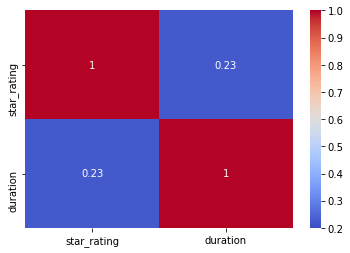

In [10]:
movies_corr = movies.corr()

# I wanted to try another heatmap with different columns and gradients.  Doesn't provide more
# than the black and white one above.
#midpoint = (movies.duration.max() - movies.duration.min()) / 10
sns.heatmap(movies_corr, cmap='coolwarm', vmin=.2, vmax=1, robust=True, annot=True);

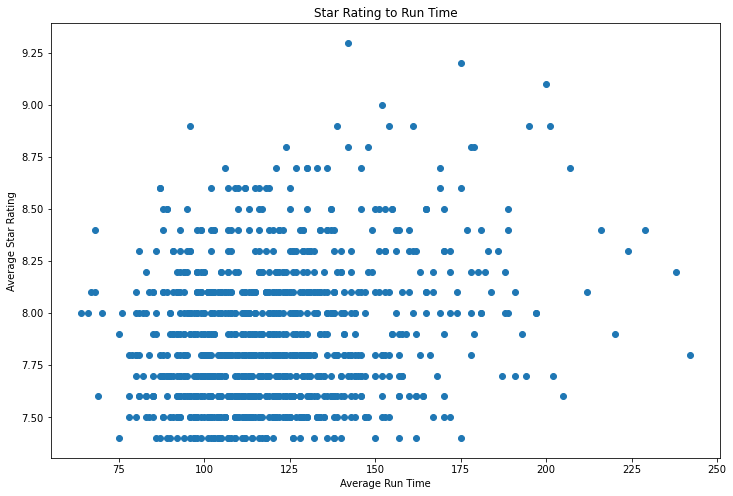

In [20]:
# One more to try and suss out a good correleation.  My theory; there is not much of a correlation.
# There's some long movies with high and low ratings, ditto short movies.  The top couple movies are
# on the longer side, but there are plenty of 120 min movies that are very highly rated.

plt.figure(figsize=(12,8))

plt.ylabel('Average Star Rating');
plt.xlabel('Average Run Time');
plt.title('Star Rating to Run Time');

plt.plot(movies['duration'], movies['star_rating'], linestyle='', marker='o');

#### Calculate the average duration for each genre.

In [42]:
# Answer:  I had to google the astype(int) because I wanted to get rid of the decimals

movies.groupby('genre').duration.mean().sort_values(ascending=False).astype(int)

genre
Western      136
Adventure    134
Biography    131
Drama        126
Action       126
Crime        122
Mystery      115
Thriller     114
Fantasy      112
Sci-Fi       109
Comedy       107
Family       107
Horror       102
Film-Noir     97
Animation     96
History       66
Name: duration, dtype: int32

## Advanced level

#### Visualize the relationship between content rating and duration.

In [41]:
# Answer:

#Had to run this to remind myself content rating and duration are different types, so can't use 
# all graph types
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
counter             int64
dtype: object

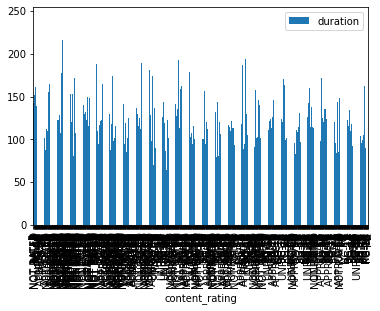

In [82]:
# Doesn't include the content rating
#sns.pairplot(movies);

# Breaks because content rating is not right format
#plt.plot(movies['duration'], movies['content_rating'], linestyle='', marker='o');

#Useless!
movies.plot(kind='bar',x='content_rating',y='duration');

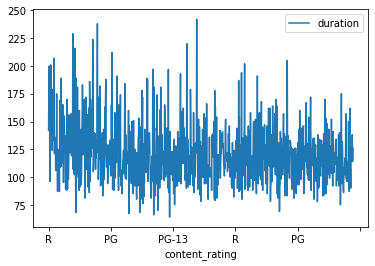

In [83]:
#This one went crazy on me too!
ax = plt.gca()

movies.plot(kind='line',x='content_rating',y='duration',ax=ax);

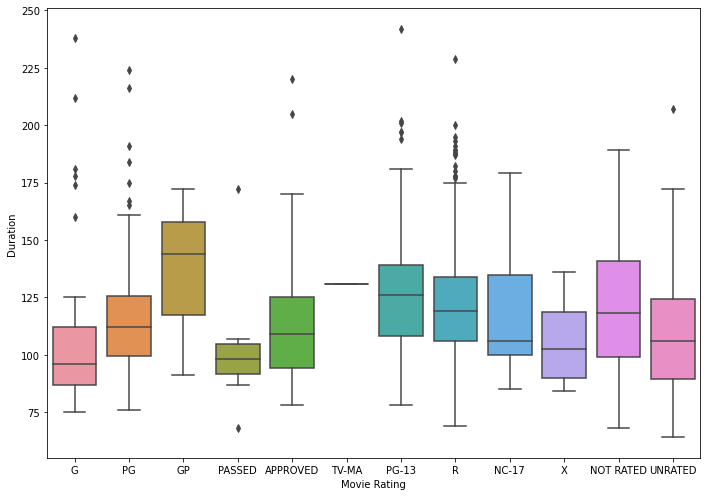

In [78]:
# I then remembered to look back at my notes and checked out the preferred num vs cat = box
# I tried a regular matplotlib box, but quickly went with seaborn

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

# I wanted a specific order from lowest rating (eg ok for all audiences to adult only)
# I put 'UNRATED' AND 'NOT RATED' at the end because some of the movies in those were hard R's.
ax = sns.boxplot(x = 'content_rating', y = 'duration', data = movies, ax=ax, 
                 order=["G", "PG", "GP", "PASSED", "APPROVED",
                        "TV-MA", "PG-13", "R", "NC-17", "X",
                        "NOT RATED", "UNRATED"])
ax.set(xlabel="Movie Rating", ylabel = "Duration");

# Conclusion.  If we look at the common ratings the movies run longer the higher the rating, but peak
# at PG-13 with R average coming down slightly, but still higher than family friendly movies.

In [86]:
# I was using this to see which movies fell in the non-normal ratings.
movies.query("content_rating == 'TV-MA'")

,star_rating,title,content_rating,genre,duration,actors_list,counter
219,8.1,Who's Afraid of Virginia Woolf?,TV-MA,Drama,131,"[u'Elizabeth Taylor', u'Richard Burton', u'Geo...",1


C:\Users\ggear\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


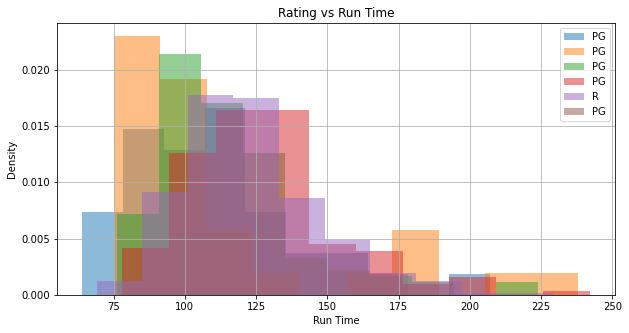

In [21]:
#Wanted to try a stacked histogram.  Not too useful, hard to see dividing lines.

plt.figure(figsize=(10,5))

plt.xlabel('Run Time');
plt.ylabel('Density');
plt.title('Rating vs Run Time');

movies.query('content_rating == "UNRATED"')['duration'].hist(bins=10,alpha=0.5, label='PG', density=True);
movies.query('content_rating == "G"')['duration'].hist(bins=10,alpha=0.5, label='PG', density=True);
movies.query('content_rating == "PG"')['duration'].hist(bins=10,alpha=0.5, label='PG', density=True);
movies.query('content_rating == "PG-13"')['duration'].hist(bins=10,alpha=0.5, label='PG', density=True);
movies.query('content_rating == "R"')['duration'].hist(bins=10, alpha=0.5, label='R', density=True);
movies.query('content_rating == "NEC-17"')['duration'].hist(bins=10,alpha=0.5, label='PG', density=True);

plt.legend();  #this call will refer to the "label" in the .hist.

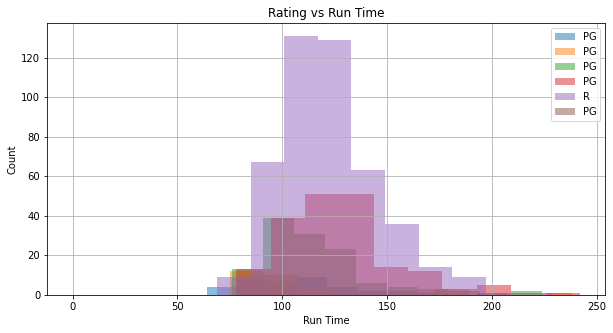

In [27]:
# Tried another  stacked histogram.  This one was better to see the number of movies rather than 
# run time to rating.

plt.figure(figsize=(10,5))

plt.xlabel('Run Time');
plt.ylabel('Count');
plt.title('Rating vs Run Time');

movies.query('content_rating == "UNRATED"')['duration'].hist(bins=10,alpha=0.5, label='PG');
movies.query('content_rating == "G"')['duration'].hist(bins=10,alpha=0.5, label='PG');
movies.query('content_rating == "PG"')['duration'].hist(bins=10,alpha=0.5, label='PG');
movies.query('content_rating == "PG-13"')['duration'].hist(bins=10,alpha=0.5, label='PG');
movies.query('content_rating == "R"')['duration'].hist(bins=10, alpha=0.5, label='R');
movies.query('content_rating == "NEC-17"')['duration'].hist(bins=10,alpha=0.5, label='PG');

plt.legend();  #this call will refer to the "label" in the .hist.

#### Determine the top rated movie (by star rating) for each genre.

In [29]:
# Answer:

#I did this, but couldn't figure out how to get the movie title.
movies.groupby('genre').max().sort_values('star_rating')['star_rating']

genre
Fantasy      7.7
Family       7.9
History      8.0
Thriller     8.0
Sci-Fi       8.2
Film-Noir    8.3
Animation    8.6
Comedy       8.6
Horror       8.6
Mystery      8.6
Adventure    8.9
Biography    8.9
Drama        8.9
Western      8.9
Action       9.0
Crime        9.3
Name: star_rating, dtype: float64

In [31]:
#with some google help I found the idxmax.
movies_top = movies.loc[movies.groupby(["genre"])["star_rating"].idxmax()]

#Display just the necessary columns
movies_top[['genre','title','star_rating']]

,genre,title,star_rating
3,Action,The Dark Knight,9.0
7,Adventure,The Lord of the Rings: The Return of the King,8.9
30,Animation,Spirited Away,8.6
8,Biography,Schindler's List,8.9
25,Comedy,Life Is Beautiful,8.6
0,Crime,The Shawshank Redemption,9.3
5,Drama,12 Angry Men,8.9
468,Family,E.T. the Extra-Terrestrial,7.9
638,Fantasy,The City of Lost Children,7.7
105,Film-Noir,The Third Man,8.3


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [31]:
# Answer:

# I looked up the "duplicated" command and ran it on the column getting True/False which wasn't helpful
movies.duplicated(subset='title')

0      False
1      False
2      False
3      False
4      False
       ...  
974    False
975    False
976    False
977    False
978    False
Length: 979, dtype: bool

In [32]:
#I then remembered I needed to apply this to the whole data set.  I had to look up how to display both sets of dupes (keep)
# None of them are true duplicates as they are remakes.

movies[movies.duplicated(subset='title', keep=False)].sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list,onetwenty
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",short
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",long
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",long
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",long
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",long
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",long
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",short
936,7.4,True Grit,PG,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",long


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [7]:
# Answer:  I first wanted to find which genres had at least ten movies.

# Groupby genre to get a count of movies per genre
movies_genre = movies.groupby('genre').count()

# countable values were created in above group, so can query on any of them greater than 10
movies_greater_ten = movies_genre.query('duration > 10').reset_index()

# just return the genre column and create a new data frame to be used below
movies_ten_genre = movies_greater_ten.genre

# confirm the results
#movies_genre
#movies_greater_ten
movies_ten_genre

0       Action
1    Adventure
2    Animation
3    Biography
4       Comedy
5        Crime
6        Drama
7       Horror
8      Mystery
Name: genre, dtype: object

In [5]:
# group by genre and star_rating to get average star_rating
# I found I needed to reset the index to help on the next cell.
genre_average = movies.groupby('genre').mean().sort_values('star_rating')['star_rating'].reset_index()

# confirm results
genre_average

,genre,star_rating
0,Thriller,7.680000
1,Fantasy,7.700000
2,Horror,7.806897
3,Comedy,7.822436
4,Family,7.850000
5,Biography,7.862338
6,Action,7.884559
7,Drama,7.902518
8,Animation,7.914516
9,Crime,7.916935


In [8]:
# merge the two datasets using an "inner" parameter to exclude those with less than 10 movies
# this made conceptual sense to me from SQL joins.
df = genre_average.merge(movies_ten_genre, how = 'inner' ,indicator=False)

# confirm results and sort by genre to look more appealing
df.sort_values(by = 'genre')

,genre,star_rating
3,Action,7.884559
7,Adventure,7.933333
5,Animation,7.914516
2,Biography,7.862338
1,Comedy,7.822436
6,Crime,7.916935
4,Drama,7.902518
0,Horror,7.806897
8,Mystery,7.975000


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [366]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [9]:
# Answer:

#Create a "counter" colum which I can use to agg later
movies['counter'] = 1

#confirm the new column
movies

,star_rating,title,content_rating,genre,duration,actors_list,counter
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",1
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",1
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",1
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",1
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",1
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",1
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",1
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",1
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",1


In [10]:
# group by genre and then aggregate on the mean star_rating then sum the counter which I'll use to
# determine if the genre has more than 10 movies in it.

# This did everything I need except sort by the counter sum (and then add a head(10))
# So I threw it into a new dataframe to work with below
movies_sorted = movies.groupby(['genre']).agg({'star_rating': [np.mean], 'counter': [np.sum]})

# check the results
movies_sorted.describe

<bound method NDFrame.describe of           star_rating counter
                 mean     sum
genre                        
Action       7.884559     136
Adventure    7.933333      75
Animation    7.914516      62
Biography    7.862338      77
Comedy       7.822436     156
Crime        7.916935     124
Drama        7.902518     278
Family       7.850000       2
Fantasy      7.700000       1
Film-Noir    8.033333       3
History      8.000000       1
Horror       7.806897      29
Mystery      7.975000      16
Sci-Fi       7.920000       5
Thriller     7.680000       5
Western      8.255556       9>

In [11]:
#Per Josh: So pandas has hierarchical indices in this case, which you have to flatten to sort 
#and index the way we are used to do doing:
# Unsure what this is doing, but it allowed me to sort below
movies_sorted.columns = pd.Index([e[0] + '_' + e[1] for e in movies_sorted.columns.tolist()])

# I could now sort the results by the "counter sum" column which was named "c__":
movies_sorted.sort_values(by='c__').tail(10)

KeyError: 'c__'

## Bonus

#### Figure out something "interesting" using the actors data!

In [12]:
# One way to filter the actors_list column
# Just doing some data exploration.  What movies per actor showed up using mask

mask = movies.actors_list.apply(lambda x: 'Marlon Brando' in x)
df1 = movies[mask]
print (df1)

#Another way to search the actors_list
#movies[movies['actors_list'].str.contains('Julianne')]

#movies.query('actors_list.str.contains("Walken")', engine='python')

     star_rating                     title content_rating  genre  duration  \
1            9.2             The Godfather              R  Crime       175   
51           8.5            Apocalypse Now              R  Drama       153   
122          8.3         On the Waterfront      NOT RATED  Crime       108   
284          8.1  A Streetcar Named Desire             PG  Drama       122   

                                           actors_list  counter  
1      [u'Marlon Brando', u'Al Pacino', u'James Caan']        1  
51   [u'Martin Sheen', u'Marlon Brando', u'Robert D...        1  
122  [u'Marlon Brando', u'Karl Malden', u'Lee J. Co...        1  
284  [u'Vivien Leigh', u'Marlon Brando', u'Kim Hunt...        1  


In [30]:
actorinos = []

for rw in movies['actors_list']:
    for actor in rw:
        if actor == "[" or actor == "]":
            pass
        else:
            actorinos.append(actor)
print(actorinos)

['u', "'", 'T', 'i', 'm', ' ', 'R', 'o', 'b', 'b', 'i', 'n', 's', "'", ',', ' ', 'u', "'", 'M', 'o', 'r', 'g', 'a', 'n', ' ', 'F', 'r', 'e', 'e', 'm', 'a', 'n', "'", ',', ' ', 'u', "'", 'B', 'o', 'b', ' ', 'G', 'u', 'n', 't', 'o', 'n', "'", 'u', "'", 'M', 'a', 'r', 'l', 'o', 'n', ' ', 'B', 'r', 'a', 'n', 'd', 'o', "'", ',', ' ', 'u', "'", 'A', 'l', ' ', 'P', 'a', 'c', 'i', 'n', 'o', "'", ',', ' ', 'u', "'", 'J', 'a', 'm', 'e', 's', ' ', 'C', 'a', 'a', 'n', "'", 'u', "'", 'A', 'l', ' ', 'P', 'a', 'c', 'i', 'n', 'o', "'", ',', ' ', 'u', "'", 'R', 'o', 'b', 'e', 'r', 't', ' ', 'D', 'e', ' ', 'N', 'i', 'r', 'o', "'", ',', ' ', 'u', "'", 'R', 'o', 'b', 'e', 'r', 't', ' ', 'D', 'u', 'v', 'a', 'l', 'l', "'", 'u', "'", 'C', 'h', 'r', 'i', 's', 't', 'i', 'a', 'n', ' ', 'B', 'a', 'l', 'e', "'", ',', ' ', 'u', "'", 'H', 'e', 'a', 't', 'h', ' ', 'L', 'e', 'd', 'g', 'e', 'r', "'", ',', ' ', 'u', "'", 'A', 'a', 'r', 'o', 'n', ' ', 'E', 'c', 'k', 'h', 'a', 'r', 't', "'", 'u', "'", 'J', 'o', 'h', 'n',

In [91]:
# I wanted to find which actor had the most movies on the list
# split the actors_list column into separate columns per actor (split on commas)
# I was trying to find a way to make the actors more easily querable, so wanted to separate
# them out.

df2 = pd.DataFrame(movies)

df3 = pd.DataFrame(movies['actors_list'].str.split(",").values.tolist())

print(movies)

     star_rating                                            title  \
0            9.3                         The Shawshank Redemption   
1            9.2                                    The Godfather   
2            9.1                           The Godfather: Part II   
3            9.0                                  The Dark Knight   
4            8.9                                     Pulp Fiction   
..           ...                                              ...   
974          7.4                                          Tootsie   
975          7.4                      Back to the Future Part III   
976          7.4  Master and Commander: The Far Side of the World   
977          7.4                                      Poltergeist   
978          7.4                                      Wall Street   

    content_rating      genre  duration  \
0                R      Crime       142   
1                R      Crime       175   
2                R      Crime       200   

In [92]:
# combined using concat the two data frames together.
# I successfully got each actor into a column, but that didn't really help me.

frames = [df3, df2]

movies_and_actors = pd.concat(frames, axis=1)

movies_and_actors

#movies_and_actors['0'] = df['0'].str.replace('u','-')


,0,1,2,star_rating,title,content_rating,genre,duration,actors_list,counter
0,[u'Tim Robbins',u'Morgan Freeman',u'Bob Gunton'],9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",1
1,[u'Marlon Brando',u'Al Pacino',u'James Caan'],9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",1
2,[u'Al Pacino',u'Robert De Niro',u'Robert Duvall'],9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",1
3,[u'Christian Bale',u'Heath Ledger',u'Aaron Eckhart'],9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",1
4,[u'John Travolta',u'Uma Thurman',u'Samuel L. Jackson'],8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",1
...,...,...,...,...,...,...,...,...,...,...
974,[u'Dustin Hoffman',u'Jessica Lange',u'Teri Garr'],7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",1
975,[u'Michael J. Fox',u'Christopher Lloyd',u'Mary Steenburgen'],7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",1
976,[u'Russell Crowe',u'Paul Bettany',u'Billy Boyd'],7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",1
977,[u'JoBeth Williams',"u""Heather O'Rourke""",u'Craig T. Nelson'],7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",1


In [93]:
# Trying a few different ways to remove unwanted characters from names (u, [, ']).
# Was not successful.

#movies['actors_list'].replace("Tim","").replace("]","").replace("u'","").replace("',",",")[:-1]

movies.replace(to_replace="[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']", value="Grantland")
#for i in movies_and_actors.actors_list:
#    for j in i:
#        translate({ ord("_"): None})
        
        
movies.replace = movies.translate({ ord("["): None})

AttributeError: 'DataFrame' object has no attribute 'translate'

In [96]:
# I DID NOT WRITE THE THREE NEXT CELLS INCLUDING THIS ONE.
# Needed a starting off point to query each individual actor
def repp(string):
    return string.replace("[","").replace("]","").replace("u'","").replace("',",",")[:-1]

#Apply that function to every entry    
movies_series = movies['actors_list'].apply(repp)

movies_clean = movies.apply(repp)

movies_clean

,star_rating,title,content_rating,genre,duration,actors_list,counter
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",1
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",1
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",1
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",1
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",1
...,...,...,...,...,...,...,...
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha...",1
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",1
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",1
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",1


In [103]:
#Declare a list to store the split values
actors_list = []
for movie_actors in movies_series:
    actors_list.append([e.strip() for e in movie_actors.split(',')])

actors_list[0:5]

[['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'],
 ['Marlon Brando', 'Al Pacino', 'James Caan'],
 ['Al Pacino', 'Robert De Niro', 'Robert Duvall'],
 ['Christian Bale', 'Heath Ledger', 'Aaron Eckhart'],
 ['John Travolta', 'Uma Thurman', 'Samuel L. Jackson']]

In [112]:
#Declare a dictionary and see if the actor name key exist and then count accordingly.
actor_dict = {}
for actor in actors_list:
    for a in actor:
        if a in actor_dict:
            actor_dict[a] +=1
        else:
            actor_dict[a] = 1

#confirm data
for x in list(actor_dict)[0:3]:
    print (x)


Tim Robbins
Morgan Freeman
Bob Gunton


In [120]:
# Now that I had the names broken out with a count of each appearnce I could see
# who has starred in the most movies.  I had to google sorting a dictionary, but mostly put this
# together myself

#De Niro is king.
top_actors = {k: v for k, v in sorted(actor_dict.items(), key=lambda item: item[1], reverse=True)}

for x in list(top_actors)[0:10]:
    print (x)

Robert De Niro
Clint Eastwood
Brad Pitt
Tom Hanks
Al Pacino
Johnny Depp
Christian Bale
Leonardo DiCaprio
Dustin Hoffman
Harrison Ford
